# Data 422

Data Wrangling, S2 2019

## Assignement 1

**20% of final grade** Total marks is **100 marks** (70 for R, 30 for Julia).

## Due date: 11am Friday 23 August 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own work**.

### Avoid plagiarism (see this [video on academic plagiarism](https://www.youtube.com/embed/reGGPUrEsC0) ). If you are not sure what may constitute code plagiarism, read this [explanation on source code plagiarism](http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism). Remember, when in doubt **declare your sources**. 

If you have any issues that affects your ability to work during the time allocated for the assignement, please DO CONTACT ME. We will find a suitable solution. In general this WON'T be an extension to the deadline (so that in the rest of the semester you are free from preoccupations). Most probably, I will ask you to submit what you have ready by the time the assignment is due, even if it is not everything we required, and I'll take into account special considerations. For any particular problem, please contact [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or the TAs (using keybase).

In [ ]:
#STUDENT NAME -YUVRAJ KHERA
#STUDENT ID - 14217806

## Instruction

For this assignment you will work with a _.csv_ data-set. Your goal is to read it in, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter-lab R notebook (for the R part, and jupyter-lab Julia notebook for the Julia part) comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: no comments, no marks.  
You can either modify this notebook or write a new one from scratch: in that case, clearly indicate which question you are asking at each step. Notice that you may well want to **use more than one cell** per answer (using some cell for the code, some for the text, and so forth).

## Comment, explain, present your work in a clear way (we may remove marks for messy notebooks)

## R part (overall 70 marks)

Do use the tidyverse syntax I introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

The first thing you may want to do is to load **tidyverse**:

importing library tidyverse so can using packages like tibble, readr, ggplot, dplyr, tidyr

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Task (a): import (5 marks)

Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 

Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

_hint_ useful functions: `read_csv()`, `glimpse()`  
_hint_ useful libraries: `tidyverse`, `readr`, `skimr`, `vis_dat`

importing csv using the read_csv function and assgning it to a data frame model called bike_df
col_names is a function that indicates if the first row contains 
column names, if true it doesn't include them in the data frame if false
it automatically parses them like it has done below.

In [2]:
bike_df = read_csv("hour.csv", col_names = TRUE)

Parsed with column specification:
cols(
  instant = col_double(),
  dteday = col_date(format = ""),
  season = col_double(),
  yr = col_double(),
  mnth = col_double(),
  hr = col_double(),
  holiday = col_double(),
  weekday = col_double(),
  workingday = col_double(),
  weathersit = col_double(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_double(),
  registered = col_double(),
  cnt = col_double()
)


checking if the csv has been imported as a data frame using the class function 

In [4]:
bike_df %>%
class()

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

checking the number of rows in the dataframe using now()

In [5]:
bike_df %>% nrow()

[1] 17379

checking the number of columns in the data frame ncol()

In [6]:
bike_df %>% ncol()

[1] 17

the glimpse function below shows the number of observations i.e the rows and 
number of variable i.e number of columns in the data set,
also it shows the data type such as double, date etc . Also it shows some of the values in the data.

In [7]:
bike_df %>% glimpse()

Observations: 17,379
Variables: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-0…
$ season     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ yr         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ mnth       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ holiday    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6…
$ workingday <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weathersit <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3…
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0.32…
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, 0.…
$ hum        <dbl

head function allows you to see the top 6 rows in the data set

In [7]:
bike_df %>% head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


tail function allows you to see the bottom 6 rows in the data set

In [8]:
bike_df %>% tail()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


calling library skimr

In [9]:
library(skimr)


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



This gives us a lot of information in a very long data frame not that easliy 
understandable but watchout in the next step skim has a nifty function 

In [10]:
bike_df %>% 
skim()

variable,type,stat,level,value,formatted
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
instant,numeric,missing,.all,0.000000,0
instant,numeric,complete,.all,17379.000000,17379
instant,numeric,n,.all,17379.000000,17379
instant,numeric,mean,.all,8690.000000,8690
instant,numeric,sd,.all,5017.029500,5017.03
instant,numeric,p0,.all,1.000000,1
instant,numeric,p25,.all,4345.500000,4345.5
instant,numeric,p50,.all,8690.000000,8690
instant,numeric,p75,.all,13034.500000,13034.5


That nifty function is kable() which helps giving a much easy to understand summary statistics when used 
 with the skim() function about the dataframe 
such as missing values , complete values , variable types, n , mean, standard deviation, 
percentiles denoted by p0,p25,p75,p100, min,max
n_unique according to variable type

In [11]:
bike_df %>% 
skim() %>% 
kable()

Skim summary statistics  
 n obs: 17379    
 n variables: 17    

Variable type: Date

| variable | missing | complete |   n   |    min     |    max     |   median   | n_unique |
|----------|---------|----------|-------|------------|------------|------------|----------|
|  dteday  |    0    |  17379   | 17379 | 2011-01-01 | 2012-12-31 | 2012-01-02 |   731    |

Variable type: numeric

|  variable  | missing | complete |   n   |  mean  |   sd    |  p0  |  p25   | p50  |   p75   | p100  |   hist   |
|------------|---------|----------|-------|--------|---------|------|--------|------|---------|-------|----------|
|   atemp    |    0    |  17379   | 17379 |  0.48  |  0.17   |  0   |  0.33  | 0.48 |  0.62   |   1   | ▁▃▆▇▇▆▁▁ |
|   casual   |    0    |  17379   | 17379 | 35.68  |  49.31  |  0   |   4    |  17  |   48    |  367  | ▇▂▁▁▁▁▁▁ |
|    cnt     |    0    |  17379   | 17379 | 189.46 | 181.39  |  1   |   40   | 142  |   281   |  977  | ▇▅▂▂▁▁▁▁ |
|  holiday   |    0    |  17379   | 1

 downlaoding library visdat which helps with visualizing a dataframe 
showing  what the classes of the columns are, and also displaying the missing data.


In [12]:
library(visdat)

vis_miss visualizes the missing data. 
X axis show us the column names and the 
y axis show us number of missing cells. Grey shows present data
black shows missing data. As there are none missing cells in our 
data frame we have no black lines and 100% present 
data and we have full grey.

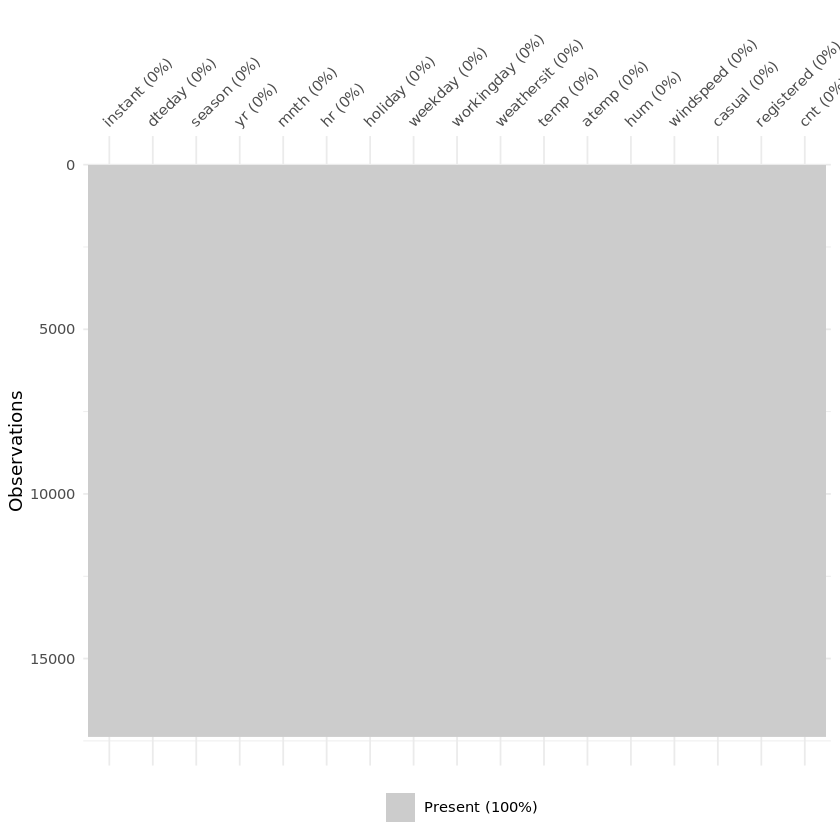

In [13]:
bike_df %>% 
vis_miss()

### Task (b): working on rows (10 marks)


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

_hint_ useful functions: `arrange()`, `top_n()`, `filter()`  
_hint_ to define a function: `myfunction <- function(myargument,anotherargument) { bodyofthefunction }`

filter() ,arrange() and top_n() (example 1)
filter function lets you filter by condition. In the code below condition is weathersit==1
arrange function lets you select in an order you want here we selected "hum" in desceding "desc" order.
top_n lets you select the number of top obersvation you want for the above arugment, here we have indicated top 10.

In [14]:
bike_df %>% 
filter(weathersit == 1) %>%
arrange(desc(hum)) %>%
top_n(10)

Selecting by cnt


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14294,2012-08-23,3,1,8,18,0,4,1,1,0.74,0.6667,0.48,0.2239,130,811,941
15109,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
15445,2012-10-10,4,1,10,17,0,3,1,1,0.58,0.5455,0.43,0.2239,91,857,948
15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
15589,2012-10-16,4,1,10,17,0,2,1,1,0.52,0.5000,0.39,0.1940,104,839,943
14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968


filter #arrange #top_n (example 2)
basically almost same as above only difference is that have removed desc from arrange function 
arrange function automatically arranges  hum in ascending order now

In [15]:
bike_df %>% 
filter(weathersit == 1) %>%
arrange(hum) %>%
top_n(10)

Selecting by cnt


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
15589,2012-10-16,4,1,10,17,0,2,1,1,0.52,0.5000,0.39,0.1940,104,839,943
15445,2012-10-10,4,1,10,17,0,3,1,1,0.58,0.5455,0.43,0.2239,91,857,948
14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
14294,2012-08-23,3,1,8,18,0,4,1,1,0.74,0.6667,0.48,0.2239,130,811,941
15109,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953


slice function lets you look at the some of the rows you want by defining the number of row here have 
defined row 1,5000,15000

In [16]:

bike_df %>%
slice(1,5000,15000)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
5000,2011-08-01,3,0,8,5,0,1,1,1,0.66,0.6061,0.83,0.1045,2,24,26
15000,2012-09-22,3,1,9,4,0,6,0,1,0.56,0.5303,0.83,0.2836,5,10,15


In [17]:
#defining my function 
bike_analysis <- function(bike_df, weathersit_data) 
{ bikedata_weathersit= bike_df %>% 
 filter(weathersit == weathersit_data)%>%
                     arrange(hum)%>%
                     top_n(12)
                return(bikedata_weathersit) }

#calling my function by assigning 2 to weather sit variable i defined in my function to filter above
 bikedata_weathersit = bike_df %>% bike_analysis(2)

#displaying the results of my function
 bikedata_weathersit


Selecting by cnt


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13309,2012-07-13,3,1,7,17,0,5,1,2,0.80,0.7121,0.36,0.1642,138,697,835
10623,2012-03-23,2,1,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,264,693,957
12542,2012-06-11,2,1,6,18,0,1,1,2,0.80,0.7273,0.43,0.2985,105,726,831
15446,2012-10-10,4,1,10,18,0,3,1,2,0.56,0.5303,0.49,0.1642,57,787,844
13933,2012-08-08,3,1,8,17,0,3,1,2,0.80,0.7576,0.55,0.2836,107,751,858
13934,2012-08-08,3,1,8,18,0,3,1,2,0.78,0.7273,0.55,0.1642,117,745,862
13909,2012-08-07,3,1,8,17,0,2,1,2,0.78,0.7424,0.62,0.1343,125,743,868
15637,2012-10-18,4,1,10,17,0,4,1,2,0.58,0.5455,0.64,0.3284,102,788,890
14893,2012-09-17,3,1,9,17,0,1,1,2,0.64,0.6061,0.65,0.2239,102,740,842


### Task (c): working on columns (10 marks)

Working on `bike_df`, show that you can operate on columns: selecting some of them, dropping other, renaming them, reordering them, ...


_hint_ useful functions: `select()`, `rename()`, ...

function colnames gives all the names of columns. We have 17 columns.


In [18]:
bike_df %>%
colnames

[1] "instant"    "dteday"     "season"     "yr"         "mnth"      
 [6] "hr"         "holiday"    "weekday"    "workingday" "weathersit"
[11] "temp"       "atemp"      "hum"        "windspeed"  "casual"    
[16] "registered" "cnt"

Selecting columns using the col names temp and windspeed



In [19]:
bike_df %>%
select(temp,windspeed) %>%
slice(10:20)

temp,windspeed
<dbl>,<dbl>
0.32,0.0000
0.38,0.2537
0.36,0.2836
0.42,0.2836
0.46,0.2985
0.46,0.2836
0.44,0.2985
0.42,0.2985
0.44,0.2836


selecting columns by giving column index from 15:17 

In [20]:
bike_df %>%
select(15:17)%>%
slice(10000:10020)

casual,registered,cnt
<dbl>,<dbl>,<dbl>
64,275,339
46,241,287
17,199,216
13,130,143
9,79,88
8,75,83
3,68,71
5,59,64
2,27,29


selecting all columns excpet the one's which end with y. 13 out of 17 column don't end up with y  
selected in the output

In [21]:
bike_df %>%
select(-ends_with("y")) %>%
slice(15000:15010)

instant,season,yr,mnth,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15000,3,1,9,4,1,0.56,0.5303,0.83,0.2836,5,10,15
15001,3,1,9,5,1,0.56,0.5303,0.83,0.3284,2,15,17
15002,3,1,9,6,1,0.56,0.5303,0.83,0.2985,6,35,41
15003,3,1,9,7,1,0.58,0.5455,0.78,0.2537,7,70,77
15004,3,1,9,8,1,0.60,0.5909,0.73,0.2985,21,197,218
15005,3,1,9,9,1,0.64,0.6061,0.69,0.2537,88,289,377
15006,3,1,9,10,1,0.66,0.6212,0.65,0.3284,124,350,474
15007,3,1,9,11,1,0.70,0.6515,0.58,0.2836,189,437,626
15008,3,1,9,12,1,0.72,0.6667,0.54,0.2985,228,460,688


Used the rename function to rename yr as year

In [22]:
bike_df %>%
 rename("year"="yr") %>%
 head(10)

instant,dteday,season,year,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


Have reordered the data frame from  column 17 to 1
displaying the reordered df


In [23]:
reorderedbike_df <-bike_df[ ,c(17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1)]
reorderedbike_df %>%
head(10)

cnt,registered,casual,windspeed,hum,atemp,temp,weathersit,workingday,weekday,holiday,hr,mnth,yr,season,dteday,instant
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
16,13,3,0.0000,0.81,0.2879,0.24,1,0,6,0,0,1,0,1,2011-01-01,1
40,32,8,0.0000,0.80,0.2727,0.22,1,0,6,0,1,1,0,1,2011-01-01,2
32,27,5,0.0000,0.80,0.2727,0.22,1,0,6,0,2,1,0,1,2011-01-01,3
13,10,3,0.0000,0.75,0.2879,0.24,1,0,6,0,3,1,0,1,2011-01-01,4
1,1,0,0.0000,0.75,0.2879,0.24,1,0,6,0,4,1,0,1,2011-01-01,5
1,1,0,0.0896,0.75,0.2576,0.24,2,0,6,0,5,1,0,1,2011-01-01,6
2,0,2,0.0000,0.80,0.2727,0.22,1,0,6,0,6,1,0,1,2011-01-01,7
3,2,1,0.0000,0.86,0.2576,0.20,1,0,6,0,7,1,0,1,2011-01-01,8
8,7,1,0.0000,0.75,0.2879,0.24,1,0,6,0,8,1,0,1,2011-01-01,9


### Task (d): groups and not (10 marks)

Working on `bike_df`, show that you can produce new variables (columns) and modify existing one; show also that you can operate on the dataframe as a whole and on groups. See *Readme.txt* to get an understanding of the variable scaling applied.

_hint_ useful functions: `mutate()`, `group_by()`, `summarise()`, `tally()`, ...

using group_by to group different weekday values
summarise function reduces the data frame by 
compressing each grouped row into one row

In [24]:
bike_df %>%
group_by(weekday) %>%
summarise(weekday_bikecount = mean(cnt))

weekday,weekday_bikecount
<dbl>,<dbl>
0,177.4688
1,183.7447
2,191.2389
3,191.1305
4,196.4367
5,196.1359
6,190.2098


mutate function can be used to add new variables or modify the current variables
here have added new variable called registerted user proportion called 
"registered_prop"

In [25]:
bike_df %>%
mutate(registered_prop = registered/cnt) %>%
head(10)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_prop
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.8125000
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.8000000
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.8437500
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.7692308
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.0000000
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,1.0000000
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0.0000000
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,0.6666667
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,0.8750000


here have grouped the data by working day and count of total rental bikes  
tally function tells observation in each of the group we have grouped by .
output shows good insights about bike rentals on working and non working days.

In [26]:
bike_df %>%
group_by(workingday,cnt) %>%
tally()

workingday,cnt,n
<dbl>,<dbl>,<int>
0,1,35
0,2,45
0,3,48
0,4,46
0,5,54
0,6,58
0,7,53
0,8,54
0,9,37


### Task (e): wide, long, tidy (10 marks)

Show that you can go back and forth between the long and the wide format of a dataframe. Then produce a tidy version of `bike_df` (or, if you think the original one is is already in the tidy data shape, explain why).

_hint_ useful functions: `spread()`, `gather()`, `na.omit()`, ...

changing from long to wide data set using the spread() function key is hr and value is cnt.
na.omit() removes any empty cell value in the dataset giving us a tidy data
oringial data is tidy data because there are no no missing values in our data when used the visdat function we didn't get any black area in graph which indicates missing data.
displaying the output from the wide data frame .

In [27]:
wide_bikedf <- bike_df %>%
select(dteday,hr,cnt) %>%
spread(key = hr, value = cnt) %>%
na.omit()

wide_bikedf %>%
head(10)

dteday,0,1,2,3,4,5,6,7,8,⋯,14,15,16,17,18,19,20,21,22,23
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011-01-01,16,40,32,13,1,1,2,3,8,⋯,106,110,93,67,35,37,36,34,28,39
2011-01-08,25,16,16,7,1,5,2,9,15,⋯,95,74,76,69,55,30,28,37,34,22
2011-01-09,25,12,11,4,1,1,1,6,10,⋯,72,82,92,62,48,41,38,20,15,6
2011-01-10,5,1,3,1,3,3,31,77,188,⋯,47,45,74,178,155,95,74,38,24,18
2011-01-13,7,2,2,3,4,3,28,72,202,⋯,42,60,78,162,144,99,64,40,30,15
2011-01-15,28,20,12,8,5,1,3,10,23,⋯,118,129,128,83,84,74,41,57,26,44
2011-01-16,39,23,16,15,1,2,1,3,18,⋯,91,113,99,105,67,61,57,28,21,18
2011-01-17,17,16,8,2,3,1,5,13,33,⋯,86,93,82,71,92,60,33,27,13,4
2011-01-20,13,5,2,1,1,6,35,101,249,⋯,81,70,91,215,185,152,126,57,56,31


converting the wide data frame to long data frame 
using the gather function using the key as hr and value cnt
the output from  the long data frame below

In [28]:

long_bikedf = wide_bikedf %>%
gather(key =hr , value = cnt,-dteday)

long_bikedf %>%
head(10)

dteday,hr,cnt
<date>,<chr>,<dbl>
2011-01-01,0,16
2011-01-08,0,25
2011-01-09,0,25
2011-01-10,0,5
2011-01-13,0,7
2011-01-15,0,28
2011-01-16,0,39
2011-01-17,0,17
2011-01-20,0,13


### Task (f): plot (10 marks)

Produce a beautiful graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. You can try different geometries, themes, mappings, ... . Make sure you label the plots with titles, and axis labels. Notice that the focus is on the use of *plotting as a data model*, rather than on the *statistical modelling* of the data.
\[ Hint: if you can't find any plotting idea, try focusing on the count of total rental bikes, and how it varies through time, season, weather, temperature, humidty, wind-speed. \]

_hint_ useful functions: `ggplot()`, `ylab()`, `xlab()`, `geom_...()`, `aes()`, `facet_...()`, ...

installing package hexbin so can use geom_hex for some of the 
plots


In [29]:
install.packages("hexbin")

Installing package into ‘/home/ykh23/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


Plot showing count of total rental bikes vs windspeed 
have used geom_hex as there are lot of points and geom_hex gives a heat map, ligther blue shade means more count
from the plot it is visual that from windpseed 0.00 to 0.50 the count of total rental bikes is
higher and also we get more lighterblue in that range , as the windspeed increases 
specially more than 0.50 the count of rental bikes is declining 
Also saving the plot using ggsave which is one of the tasks
of part g

Saving 6.67 x 6.67 in image


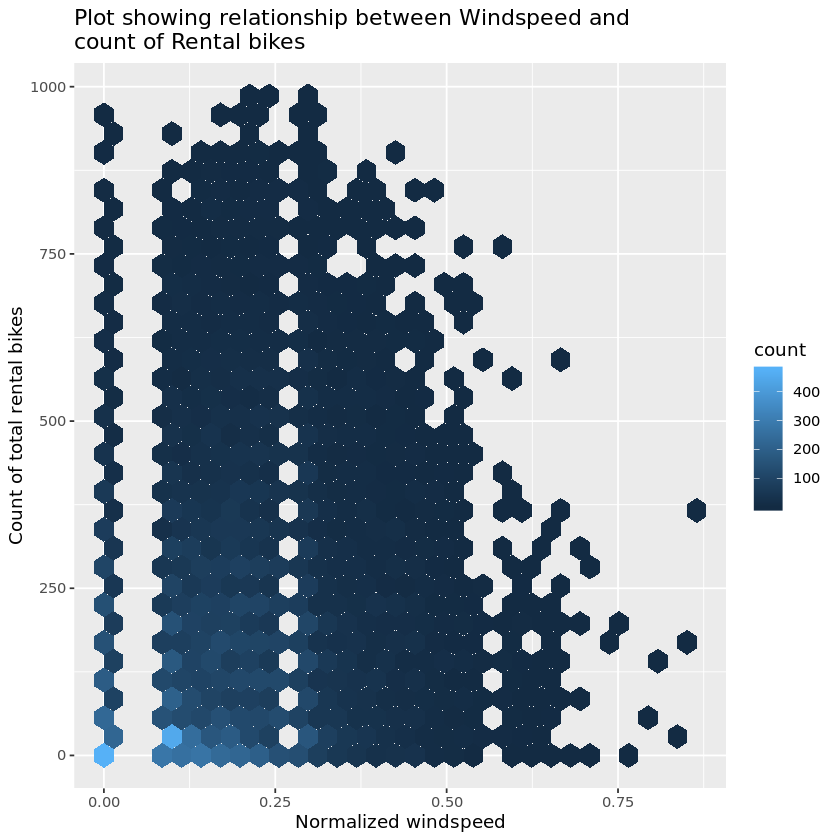

In [30]:

bike_df %>% 
ggplot(aes(x =windspeed, y = cnt))   +
xlab("Normalized windspeed") + ylab("Count of total rental bikes") + ggtitle("Plot showing relationship between Windspeed and 
count of Rental bikes") + geom_hex() 
ggsave(filename="windspeed vs count of rental.png")

box plot showing the count of rental bikes according to different seasons 
used function geom_boxplot with outliers in red.
saving the plot using ggsave(), answering one of the tasks of part g .

Saving 6.67 x 6.67 in image


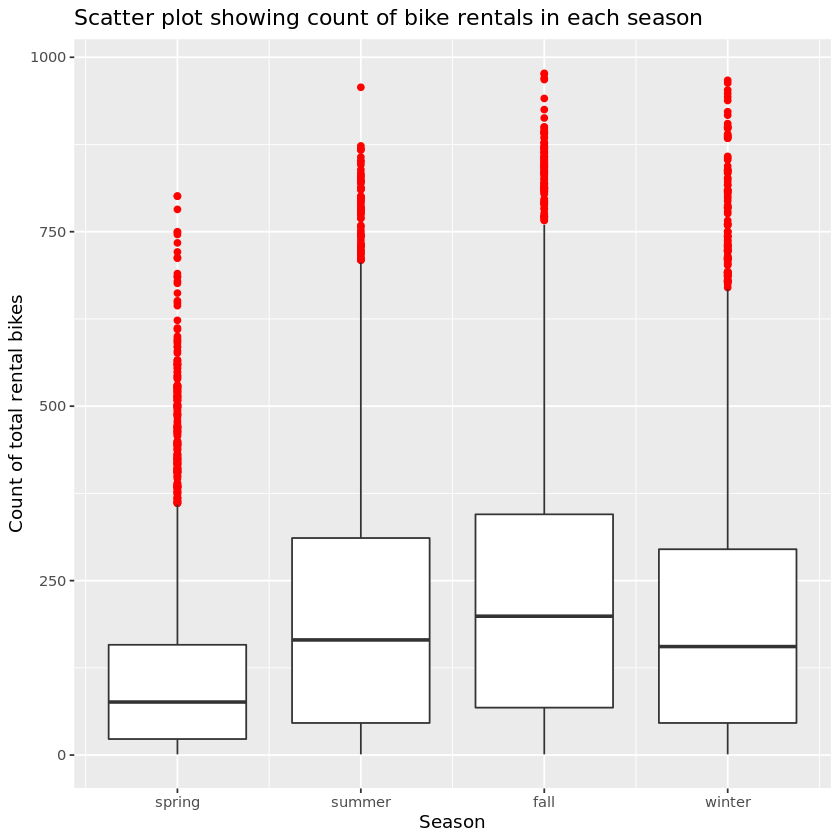

In [31]:
bike_df %>% 
ggplot( aes(x =season, y = cnt, group = season)) + geom_boxplot(outlier.colour = "red") + 
xlab("Season") + ylab("Count of total rental bikes") + ggtitle("Scatter plot showing count of bike rentals in each season") + 
scale_x_continuous(breaks = c(1:4),labels = c("spring","summer","fall","winter"))
 ggsave(filename="count of rental bikes per season.png")

Have used geom_line to show a time series graph of bike rentals  for 2011 and 2012
used dteday (x) as the time and cnt(y) as the count of bike rentals
saving the plot, answering one of the tasks of part g using ggsave

Saving 6.67 x 6.67 in image


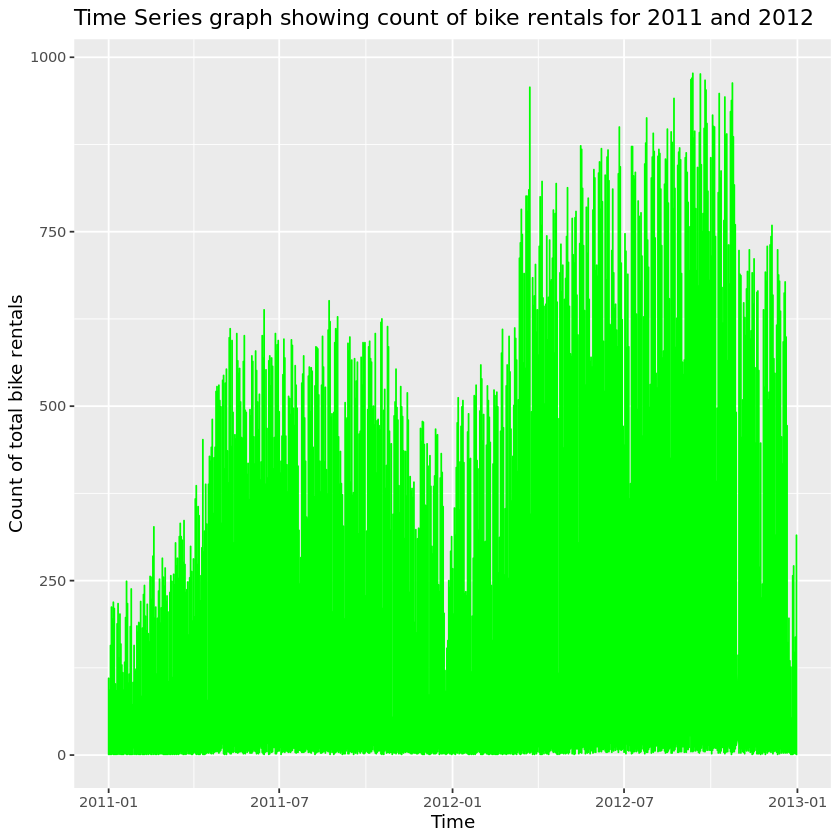

In [32]:
bike_df %>%
ggplot(aes(x = dteday, y = cnt)) + geom_line(color = "green") + xlab("Time") + ylab("Count of total bike rentals") + ggtitle("Time Series graph showing count of bike rentals for 2011 and 2012")
 
ggsave(filename="time series of bike rentals 2011 and 2012.png")

### Task (g): save (5 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

plots have been saved in task f using the function ggsave()using the function write_csv to save our bike_df as "bikerentals.csv"

In [34]:

bike_df  %>%
write_csv("bikerentals.csv")

Task 1 , i have plotted x =hr vs y= registered bike users rental count. 
it is visible that from the bar graphs below what bike rental CEO claims is true as 6am to 10am is one of the peak times for
registered users renting bikes also about 3pm to 8 pm is another peak time for registered users renting bikes
.Used the face_wrap to separate out the 4 seasons and labeled them as well. There is slight variability between the seasons during 6-10am but bike rental is still quiet strong in that time frame but as mentioned above 3pm to 8pm is the highest peak time as visual from the data below.

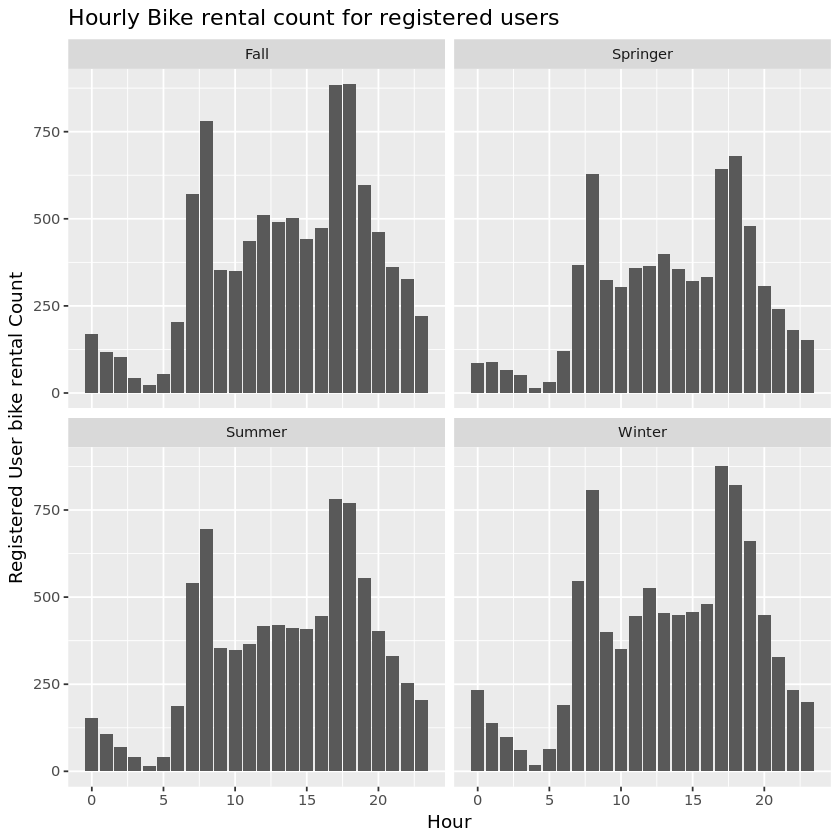

In [35]:
bike_df %>%
mutate(season = recode(season, "1"="Springer",
"2"="Summer","3"="Fall","4" ="Winter") ) %>%
ggplot(aes(x = hr, y = registered)) + geom_bar(stat= "identity", position = "dodge") + 
xlab("Hour") + ylab("Registered User bike rental Count") + ggtitle("Hourly Bike rental count for registered users") + facet_wrap(vars(season))

Task 2 creating a getmode function which i will use to get the most frequent weather situation between 6 to 10 the previous day.

In [83]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


loading the lubridate library to work on dates

In [84]:
library(lubridate)

Defined new data frame bike_df2 , filter hour weather from 17hrs to 21hrs which will cover weather from 17hrs to 21hrs and 59 mins. Also mutating a new variable "daybefore" which i will use to pass the date function to add +1 day as we want to test the weather the night before and the usage next day by registered users.

In [85]:
bike_df2 <- bike_df %>%
filter(as.factor(hr) %in% c(17, 18, 19, 20, 21)) %>%
mutate(daybefore = dteday) %>%
group_by(daybefore) %>%
summarise(daybeforeweather = getmode(weathersit)) 

bike_df2$daybefore = ymd(bike_df2$daybefore) + 1





Full joining bike_df2 to bike_df by "daybefore" i created above. This will allow us 
to compare the registered users bikes usage vs the weather the night before which i have
called "daybeforeweather". 
Our plot showing that bike usage does depend for registered user on the weather day before.
As you can see it is higher for weather condition 1 (good condition) from the plot below. Winter and fall even higher usage depending on the weather day before.

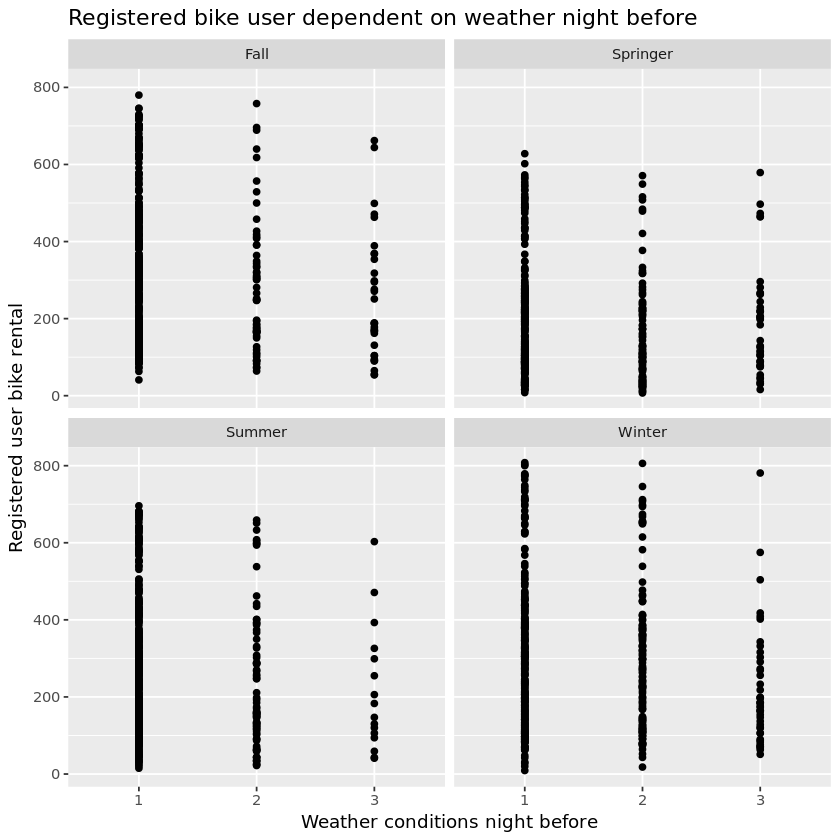

In [89]:
bike_df2 %>%
full_join(bike_df, by=c("daybefore" = "dteday")) %>%
filter(workingday == 1, as.factor(hr) %in% c(6, 7, 8, 9)) %>% 
mutate(season = recode(season, "1"="Springer",
"2"="Summer","3"="Fall","4" ="Winter") ) %>%
ggplot(aes(x = as.factor(daybeforeweather), y = registered)) + geom_point() + xlab("Weather conditions night before") + ylab("Registered user bike rental") + ggtitle("Registered bike user dependent on weather night before") + facet_wrap(vars(season))